HW2
Siyi Fan

In [2]:
import pandas as pd
import random
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
testfile = open('gdrive/My Drive/Colab Notebooks/data/congress_train.csv', "r+",encoding='utf-8', errors='ignore')
text = testfile.read()
testfile.seek(0)
testfile.write(text)
testfile.close()

trainfile = open('gdrive/My Drive/Colab Notebooks/data/congress_val.csv', "r+",encoding='utf-8', errors='ignore')
text = trainfile.read()
trainfile.seek(0)
trainfile.write(text)
trainfile.close()

valfile = open('gdrive/My Drive/Colab Notebooks/data/congress_test.csv', "r+",encoding='utf-8', errors='ignore')
text = valfile.read()
valfile.seek(0)
valfile.write(text)
valfile.close()



In [0]:
train_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/congress_train.csv').dropna()
valid_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/congress_val.csv').dropna()
test_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/congress_test.csv').dropna()

train_text = list(train_df['Title'])
train_text = [str(i) for i in train_text]
valid_text = list(valid_df['Title'])
valid_text = [str(i) for i in valid_text]
test_text = list(test_df['Title'])
test_text = [str(i) for i in test_text]

train_y = to_categorical(list(train_df['Major']))
valid_y = to_categorical(list(valid_df['Major']))
test_y = to_categorical(list(test_df['Major']))

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)

train_seq = tokenizer.texts_to_sequences(train_text)
test_seq = tokenizer.texts_to_sequences(test_text)
valid_seq = tokenizer.texts_to_sequences(valid_text)

train_x = pad_sequences(train_seq, maxlen=100)
test_x = pad_sequences(test_seq, maxlen=100)
valid_x = pad_sequences(valid_seq, maxlen=100)

In [6]:
ff = Sequential()
ff.add(Embedding(10000, 20, input_length=100))
ff.add(Flatten())
ff.add(Dense(24, activation='softmax'))
ff.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_ff = ff.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

loss_ff = result_ff.history['val_loss']
acc_ff = result_ff.history['val_acc']

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 6s 23us/step - loss: 1.9548 - acc: 0.4620 - val_loss: 1.1572 - val_acc: 0.7005
Epoch 2/50
278612/278612 [==============================] - 4s 14us/step - loss: 0.9029 - acc: 0.7660 - val_loss: 0.7781 - val_acc: 0.7948
Epoch 3/50
278612/278612 [==============================] - 4s 14us/step - loss: 0.6933 - acc: 0.8148 - val_loss: 0.6851 - val_acc: 0.8179
Epoch 4/50
278612/278612 [==============================] - 4s 14us/step - loss: 0.6142 - acc: 0.8338 - val_loss: 0.6453 - val_acc: 0.8308
Epoch 5/50
278612/278612 [==============================] - 4s 14us/step - loss: 0.5677 - acc: 0.8456 - val_loss: 0.6188 - val_acc: 0.8357
Epoch 6/50
278612/278612 [==============================] - 4s 14us/step - loss: 0.5351 - acc: 0.8539 - val_loss: 0.6054 - val_acc: 0.

In [7]:
rnn = Sequential()
rnn.add(Embedding(10000, 20, input_length=100))
rnn.add(SimpleRNN(20))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn = rnn.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

loss_rnn1 = result_rnn.history['val_loss']
acc_rnn1 = result_rnn.history['val_acc']

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 51s 182us/step - loss: 2.3188 - acc: 0.3224 - val_loss: 1.7822 - val_acc: 0.4602
Epoch 2/50
278612/278612 [==============================] - 50s 179us/step - loss: 1.5307 - acc: 0.5607 - val_loss: 1.4269 - val_acc: 0.5935
Epoch 3/50
278612/278612 [==============================] - 50s 180us/step - loss: 1.2347 - acc: 0.6641 - val_loss: 1.1852 - val_acc: 0.6826
Epoch 4/50
278612/278612 [==============================] - 50s 180us/step - loss: 1.0889 - acc: 0.7106 - val_loss: 1.8278 - val_acc: 0.4926
Epoch 5/50
278612/278612 [==============================] - 50s 179us/step - loss: 1.0064 - acc: 0.7365 - val_loss: 1.0548 - val_acc: 0.7234
Epoch 6/50
278612/278612 [==============================] - 50s 180us/step - loss: 0.9462 - acc: 0.7542 - val_loss: 1.0430 - val_acc: 0.7270
Epoch 7/50
278612/278612 [==============================] - 50s 180us/step - loss: 0.8936 - acc: 0.7682

In [8]:
lstm = Sequential()
lstm.add(Embedding(10000, 20, input_length=100))
lstm.add(LSTM(20))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm = lstm.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

loss_lstm = result_lstm.history['val_loss']
acc_lstm = result_lstm.history['val_acc']

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 128s 460us/step - loss: 2.3576 - acc: 0.2920 - val_loss: 1.8170 - val_acc: 0.4860
Epoch 2/50
278612/278612 [==============================] - 127s 454us/step - loss: 1.4835 - acc: 0.5993 - val_loss: 1.3045 - val_acc: 0.6512
Epoch 3/50
278612/278612 [==============================] - 127s 457us/step - loss: 1.0805 - acc: 0.7252 - val_loss: 0.9812 - val_acc: 0.7556
Epoch 4/50
278612/278612 [==============================] - 127s 456us/step - loss: 0.8652 - acc: 0.7861 - val_loss: 0.8633 - val_acc: 0.7794
Epoch 5/50
278612/278612 [==============================] - 126s 452us/step - loss: 0.7543 - acc: 0.8120 - val_loss: 0.7747 - val_acc: 0.8057
Epoch 6/50
278612/278612 [==============================] - 127s 455us/step - loss: 0.6859 - acc: 0.8272 - val_loss: 0.7205 - val_acc: 0.8174
Epoch 7/50
278612/278612 [==============================] - 126s 453us/step - loss: 0.6383 - acc:

In [9]:
gru = Sequential()
gru.add(Embedding(10000, 20, input_length=100))
gru.add(GRU(20))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru = gru.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

loss_gru = result_gru.history['val_loss']
acc_gru = result_gru.history['val_acc']

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 116s 416us/step - loss: 2.5397 - acc: 0.2240 - val_loss: 2.1866 - val_acc: 0.3248
Epoch 2/50
278612/278612 [==============================] - 114s 410us/step - loss: 1.8867 - acc: 0.4415 - val_loss: 1.6421 - val_acc: 0.5256
Epoch 3/50
278612/278612 [==============================] - 115s 411us/step - loss: 1.4092 - acc: 0.6019 - val_loss: 1.2988 - val_acc: 0.6450
Epoch 4/50
278612/278612 [==============================] - 117s 419us/step - loss: 1.0940 - acc: 0.7120 - val_loss: 1.0024 - val_acc: 0.7484
Epoch 5/50
278612/278612 [==============================] - 114s 411us/step - loss: 0.8911 - acc: 0.7775 - val_loss: 0.8630 - val_acc: 0.7893
Epoch 6/50
278612/278612 [==============================] - 116s 417us/step - loss: 0.7707 - acc: 0.8079 - val_loss: 0.8148 - val_acc: 0.7979
Epoch 7/50
278612/278612 [==============================] - 115s 413us/step - loss: 0.7022 - acc:

In [10]:
# 2-layers RNN 
rnn2 = Sequential()
rnn2.add(Embedding(10000, 20, input_length=100))
rnn2.add(SimpleRNN(20, return_sequences=True))
rnn2.add(SimpleRNN(20))
rnn2.add(Dense(24, activation='softmax'))
rnn2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn2 = rnn2.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

loss_rnn2 = result_rnn2.history['val_loss']
acc_rnn2 = result_rnn2.history['val_acc']

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 96s 344us/step - loss: 2.2242 - acc: 0.3414 - val_loss: 1.8441 - val_acc: 0.4287
Epoch 2/20
278612/278612 [==============================] - 95s 342us/step - loss: 1.5936 - acc: 0.5465 - val_loss: 1.4720 - val_acc: 0.5909
Epoch 3/20
278612/278612 [==============================] - 96s 345us/step - loss: 1.2787 - acc: 0.6544 - val_loss: 1.4176 - val_acc: 0.6001
Epoch 4/20
278612/278612 [==============================] - 96s 345us/step - loss: 1.1097 - acc: 0.7080 - val_loss: 1.1208 - val_acc: 0.7073
Epoch 5/20
278612/278612 [==============================] - 95s 341us/step - loss: 1.0205 - acc: 0.7329 - val_loss: 1.1474 - val_acc: 0.6922
Epoch 6/20
278612/278612 [==============================] - 95s 340us/step - loss: 0.9591 - acc: 0.7500 - val_loss: 1.0628 - val_acc: 0.7188
Epoch 7/20
278612/278612 [==============================] - 97s 347us/step - loss: 0.9067 - acc: 0.7645

In [11]:
# 4-layers RNN 
rnn4 = Sequential()
rnn4.add(Embedding(10000, 20, input_length=100))
rnn4.add(SimpleRNN(20, return_sequences=True))
rnn4.add(SimpleRNN(20, return_sequences=True))
rnn4.add(SimpleRNN(20, return_sequences=True))
rnn4.add(SimpleRNN(20))
rnn4.add(Dense(24, activation='softmax'))
rnn4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn4 = rnn4.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

loss_rnn4 = result_rnn4.history['val_loss']
acc_rnn4 = result_rnn4.history['val_acc']

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 183s 659us/step - loss: 2.1647 - acc: 0.3624 - val_loss: 1.5835 - val_acc: 0.5607
Epoch 2/20
278612/278612 [==============================] - 179s 641us/step - loss: 1.3512 - acc: 0.6320 - val_loss: 1.3245 - val_acc: 0.6402
Epoch 3/20
278612/278612 [==============================] - 180s 647us/step - loss: 1.1326 - acc: 0.7033 - val_loss: 1.1290 - val_acc: 0.7039
Epoch 4/20
278612/278612 [==============================] - 178s 640us/step - loss: 1.0333 - acc: 0.7322 - val_loss: 1.0972 - val_acc: 0.7104
Epoch 5/20
278612/278612 [==============================] - 185s 665us/step - loss: 0.9690 - acc: 0.7504 - val_loss: 1.0655 - val_acc: 0.7214
Epoch 6/20
278612/278612 [==============================] - 182s 654us/step - loss: 0.9154 - acc: 0.7645 - val_loss: 1.0764 - val_acc: 0.7145
Epoch 7/20
278612/278612 [==============================] - 180s 647us/step - loss: 0.8734 - acc:

In [12]:
rnn_drop = Sequential()
rnn_drop.add(Embedding(10000, 20, input_length=100))
rnn_drop.add(SimpleRNN(20, dropout=0.3))
rnn_drop.add(Dense(24, activation='softmax'))
rnn_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_drop = rnn_drop.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

loss_rnn_drop = result_rnn_drop.history['val_loss']
acc_rnn_drop = result_rnn_drop.history['val_acc']

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 54s 193us/step - loss: 2.4891 - acc: 0.2586 - val_loss: 2.0377 - val_acc: 0.3941
Epoch 2/20
278612/278612 [==============================] - 53s 190us/step - loss: 1.7225 - acc: 0.4869 - val_loss: 1.5024 - val_acc: 0.5518
Epoch 3/20
278612/278612 [==============================] - 54s 194us/step - loss: 1.4612 - acc: 0.5818 - val_loss: 1.3759 - val_acc: 0.6222
Epoch 4/20
278612/278612 [==============================] - 53s 191us/step - loss: 1.3344 - acc: 0.6316 - val_loss: 1.2924 - val_acc: 0.6477
Epoch 5/20
278612/278612 [==============================] - 53s 191us/step - loss: 1.2466 - acc: 0.6657 - val_loss: 1.1542 - val_acc: 0.7016
Epoch 6/20
278612/278612 [==============================] - 53s 191us/step - loss: 1.1705 - acc: 0.6900 - val_loss: 1.2304 - val_

In [13]:
lstm_drop = Sequential()
lstm_drop.add(Embedding(10000, 20, input_length=100))
lstm_drop.add(LSTM(20, dropout=0.3))
lstm_drop.add(Dense(24, activation='softmax'))
lstm_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm_drop = lstm_drop.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

loss_lstm_drop = result_lstm_drop.history['val_loss']
acc_lstm_drop = result_lstm_drop.history['val_acc']

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 137s 492us/step - loss: 2.3226 - acc: 0.3120 - val_loss: 1.7247 - val_acc: 0.5197
Epoch 2/20
278612/278612 [==============================] - 135s 485us/step - loss: 1.4944 - acc: 0.5866 - val_loss: 1.1983 - val_acc: 0.6874
Epoch 3/20
278612/278612 [==============================] - 136s 487us/step - loss: 1.1147 - acc: 0.7113 - val_loss: 0.9586 - val_acc: 0.7606
Epoch 4/20
278612/278612 [==============================] - 136s 487us/step - loss: 0.9267 - acc: 0.7631 - val_loss: 0.8592 - val_acc: 0.7812
Epoch 5/20
278612/278612 [==============================] - 135s 485us/step - loss: 0.8223 - acc: 0.7918 - val_loss: 0.7940 - val_acc: 0.8004
Epoch 6/20
278612/278612 [==============================] - 136s 489us/step - loss: 0.7590 - acc: 0.8064 - val_loss: 0.7151 - val_acc: 0.8192
Epoch 7/20
278612/278612 [==============================] - 135s 484us/step - loss: 0.7161 - acc:

In [14]:
gru_drop = Sequential()
gru_drop.add(Embedding(10000, 20, input_length=100))
gru_drop.add(GRU(20, dropout=0.3))
gru_drop.add(Dense(24, activation='softmax'))
gru_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru_drop = gru_drop.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

loss_gru_drop = result_gru_drop.history['val_loss']
acc_gru_drop = result_gru_drop.history['val_acc']

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 122s 437us/step - loss: 2.5302 - acc: 0.2268 - val_loss: 2.0885 - val_acc: 0.3571
Epoch 2/20
278612/278612 [==============================] - 121s 433us/step - loss: 1.8032 - acc: 0.4691 - val_loss: 1.5501 - val_acc: 0.5770
Epoch 3/20
278612/278612 [==============================] - 120s 432us/step - loss: 1.4267 - acc: 0.6133 - val_loss: 1.2245 - val_acc: 0.6861
Epoch 4/20
278612/278612 [==============================] - 121s 433us/step - loss: 1.1927 - acc: 0.6892 - val_loss: 1.0473 - val_acc: 0.7377
Epoch 5/20
278612/278612 [==============================] - 121s 434us/step - loss: 1.0439 - acc: 0.7323 - val_loss: 0.9460 - val_acc: 0.7628
Epoch 6/20
278612/278612 [==============================] - 121s 434us/step - loss: 0.9435 - acc: 0.7595 - val_loss: 0.8856 - val_acc: 0.7757
Epoch 7/20
278612/278612 [==============================] - 121s 436us/step - loss: 0.8744 - acc:

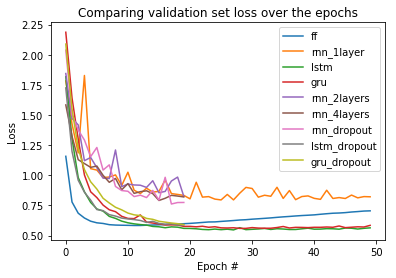

In [15]:
plt.plot(loss_ff)
plt.plot(loss_rnn1)
plt.plot(loss_lstm)
plt.plot(loss_gru)
plt.plot(loss_rnn2)
plt.plot(loss_rnn4)
plt.plot(loss_rnn_drop)
plt.plot(loss_lstm_drop)
plt.plot(loss_gru_drop)
plt.legend(['ff', 'rnn_1layer', 'lstm', 'gru', 'rnn_2layers', 'rnn_4layers', 'rnn_dropout', 'lstm_dropout', 'gru_dropout'])
plt.title('Comparing validation set loss over the epochs')
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()



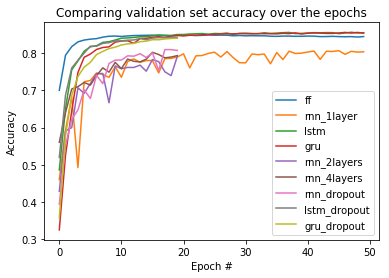

In [16]:
plt.plot(acc_ff)
plt.plot(acc_rnn1)
plt.plot(acc_lstm)
plt.plot(acc_gru)
plt.plot(acc_rnn2)
plt.plot(acc_rnn4)
plt.plot(acc_rnn_drop)
plt.plot(acc_lstm_drop)
plt.plot(acc_gru_drop)
plt.legend(['ff', 'rnn_1layer', 'lstm', 'gru', 'rnn_2layers', 'rnn_4layers', 'rnn_dropout', 'lstm_dropout', 'gru_dropout'])
plt.title("Comparing validation set accuracy over the epochs")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.show()

The best performing model is LSTM. GRU also performs well though. 





In [18]:
gru.evaluate(test_x, test_y)

38693/38693 [==============================] - 84s 2ms/step


[0.5931422505338548, 0.851859509473538]

In [17]:
lstm.evaluate(test_x, test_y)

38693/38693 [==============================] - 95s 2ms/step


[0.570334076369209, 0.8540821337208179]

The test accuracy rate for LSTM is 85.41%, which performs worse than hand-coding.